# Mounthly Electricity Statistics

Informe sobre el conjunto de datos de producción eléctrica en los países miembros de la OCDE:

***Descripción completa:***
Este conjunto de datos proviene de la International Energy Agency (IEA) y se refiere a la producción eléctrica neta en los países miembros de la OCDE durante un periodo de tiempo específico. Contiene información sobre el balance de producción eléctrica, los productos y las fuentes de energía utilizadas para generar electricidad. El número de muestras y variables puede variar dependiendo de la disponibilidad de datos en cada país miembro de la OCDE.

***Las variables en este conjunto de datos son:***

- País: países miembros de la OCDE
- Periodo de tiempo: específico
- Balance: producción eléctrica neta
- Producto: energía eléctrica
- Fuentes de energía utilizadas: combustibles fósiles, energías renovables, etc.
- Todas las variables son cuantitativas, ya que se refieren a cantidades numéricas medidas en GWh.


***Fuente:*** Este conjunto de datos se obtuvo de la página web de la IEA en: https://www.iea.org/data-and-statistics/data-product/monthly-electricity-statistics

***Razones para la selección:***
Este conjunto de datos ha sido seleccionado por el alumno porque es relevante para el estudio del uso de energías renovables y su impacto en la producción eléctrica de los países miembros de la OCDE. En este caso, se desea conocer el porcentaje de producción eléctrica en cada país miembro de la OCDE que proviene de fuentes renovables y compararlo con la producción a partir de combustibles fósiles. Además, se desea analizar cómo se distribuye la producción eléctrica entre diferentes fuentes renovables y combustibles fósiles en los diferentes países miembros de la OCDE. Esto proporcionará información valiosa sobre los esfuerzos de cada país para reducir su dependencia de combustibles fósiles y aumentar su uso de energías renovables.


`Guillermo Leiro Arroyo`

In [85]:
import pandas as pd
import seaborn as sns

In [86]:
# Importing the CSV as a dataframe and ignoring the header lines regarding licensing.
raw_df = pd.read_csv("MES_0922.csv", header=8)

## Data structure

The data contains 6 differents colums with the following data:
1.   `Country`: Country of origin.
1.   `Time`: Time stamp of the trade or consumption.
1.   `Balance`: What the energy was used for.
1.   `Product`: Origin or source of the energy.
1.   `Value`: Quantity of of energy in GWh
1.   `Unit`: GWh (All the units are spresed in GWh as we can see bellow.)

In [94]:
# Copy the dataframe to our new dataframe varible, so this cell can be rerunned with out problems.
df = raw_df
# Selecting only the data related with Electricity Production for all the avaliable entries.
df = df[df['Balance'] == 'Net Electricity Production']
# Passing Time to a Pandas user friendly time format.
df['Time'] = pd.to_datetime(df['Time'])
# Droping unnecesary columns.
df = df.drop(['Unit', 'Balance'], axis=1)
# Removing unwanted Countries from our dataset.
df = df[df['Country'].isin(['OECD Americas', 'OECD Asia Oceania','OECD Europe', 'OECD Total', 'IEA Total']) == False]
# Removing unwanted Products.
df = df[df['Product'].isin(['Electricity', 'Total Combustible Fuels','Total Renewables (Geo, Solar, Wind, Other)']) == False]
df.head()

/var/folders/1v/lt8k31gd3cgg0zzswq00zfgr0000gn/T/ipykernel_23204/3408641301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'])


,Country,Time,Product,Value
2,Australia,2022-09-01,"Coal, Peat and Manufactured Gases",9631.9664
3,Australia,2022-09-01,Oil and Petroleum Products,333.9555
4,Australia,2022-09-01,Natural Gas,3566.2116
5,Australia,2022-09-01,Combustible Renewables,245.7543
6,Australia,2022-09-01,Hydro,1487.2850


In [88]:
# A little preview of our dataframe
raw_df.head(5)

,Country,Time,Balance,Product,Value,Unit
0,Australia,September 2022,Net Electricity Production,Electricity,21161.5036,GWh
1,Australia,September 2022,Net Electricity Production,Total Combustible Fuels,13777.8878,GWh
2,Australia,September 2022,Net Electricity Production,"Coal, Peat and Manufactured Gases",9631.9664,GWh
3,Australia,September 2022,Net Electricity Production,Oil and Petroleum Products,333.9555,GWh
4,Australia,September 2022,Net Electricity Production,Natural Gas,3566.2116,GWh


In [89]:
# Possible values for column "Balance".
raw_df.Balance.unique()

array(['Net Electricity Production', 'Used for pumped storage',
       'Distribution Losses', 'Final Consumption (Calculated)',
       'Total Imports', 'Total Exports'], dtype=object)

In [90]:
# Possible values for column "Product"
raw_df.Product.unique()

array(['Electricity', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Hydro', 'Wind', 'Solar',
       'Total Renewables (Geo, Solar, Wind, Other)',
       'Other Combustible Non-Renewables', 'Geothermal', 'Not Specified',
       'Nuclear', 'Other Renewables'], dtype=object)

In [91]:
# Prove that only "GWh" are used.
raw_df.Unit.unique()

array(['GWh'], dtype=object)

In [92]:
# Diferent country of regions on column "Country"
raw_df.Country.unique()
#len(mes.Country.unique())

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Republic of Turkiye', 'United Kingdom',
       'United States', 'OECD Americas', 'OECD Asia Oceania',
       'OECD Europe', 'OECD Total', 'IEA Total', 'Argentina', 'Brazil',
       'Bulgaria', "People's Republic of China", 'Croatia', 'Cyprus',
       'India', 'Malta', 'North Macedonia', 'Romania', 'Serbia'],
      dtype=object)

In [93]:
raw_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Value
count,126323.00
mean,18386.51
std,78703.26
min,-19.22
25%,52.83
50%,664.51
75%,4245.31
max,1005747.88


# Single variable hipothesis

1.   [Reports to the `IEA` by country.](#reports-to-the-iea-by-country)
2.   [Reports to the `IEA` by geographic location.](#reports-to-the-iea-by-geographic-location)
3.   [Submissions over time evolution.](#submissions-over-time-evolution)


### Reports to the `IEA` by country.

<AxesSubplot: title={'center': 'Reports to the IEA by Country'}, xlabel='Countries', ylabel='Reports Frecuency'>

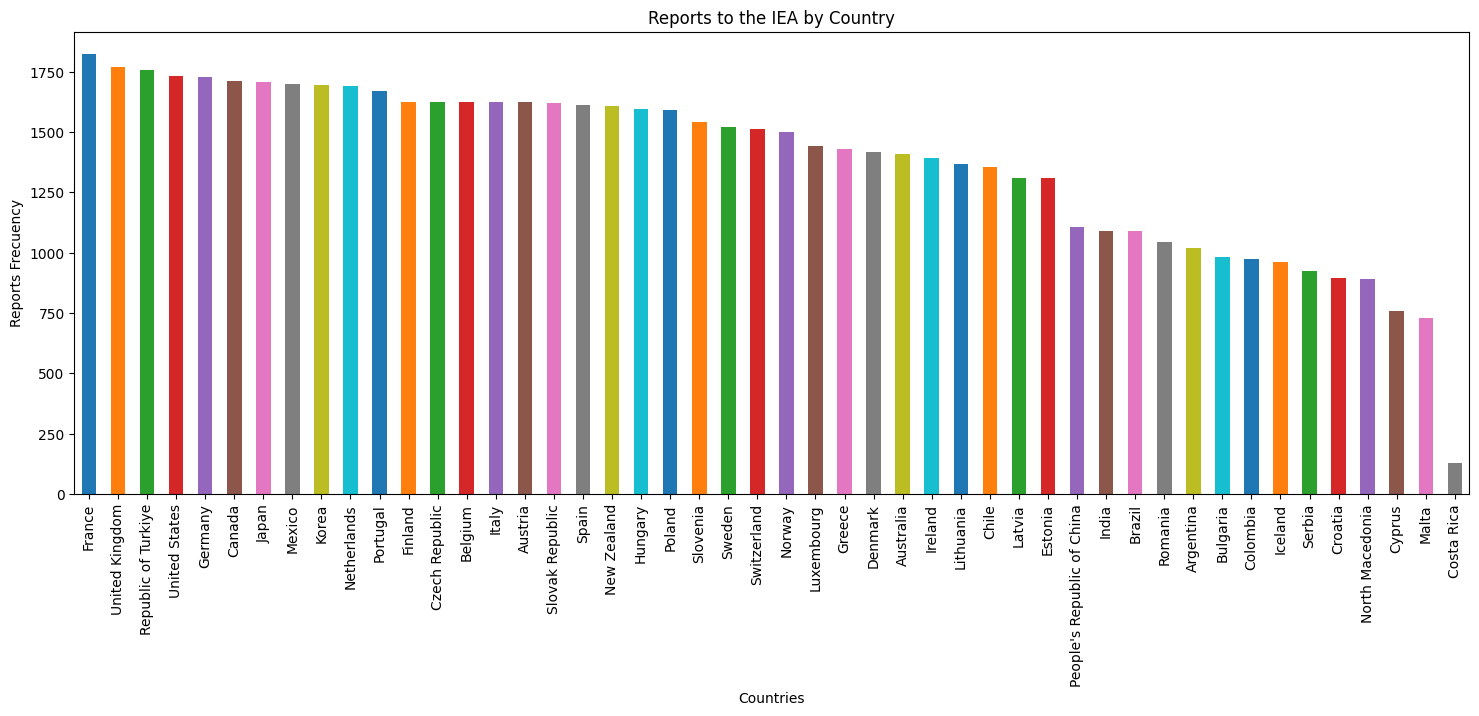

In [95]:
df['Country'].value_counts().plot.bar(figsize=(18, 6),
    xlabel = "Countries",
    ylabel = "Reports Frecuency",
    title='Reports to the IEA by Country',
    color = ["C"+str(i) for i in range(df['Country'].value_counts().count())],
)

### Reports to the `IEA` by geographic location.

/var/folders/1v/lt8k31gd3cgg0zzswq00zfgr0000gn/T/ipykernel_23204/3241796566.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Country'] == "Spain"][df['Time'] > "2022-01"].groupby('Product').sum('Value').sort_values('Value', ascending=False).plot.hist(figsize=(18, 6),


<AxesSubplot: title={'center': 'Net Energy Production'}, ylabel='Frequency'>

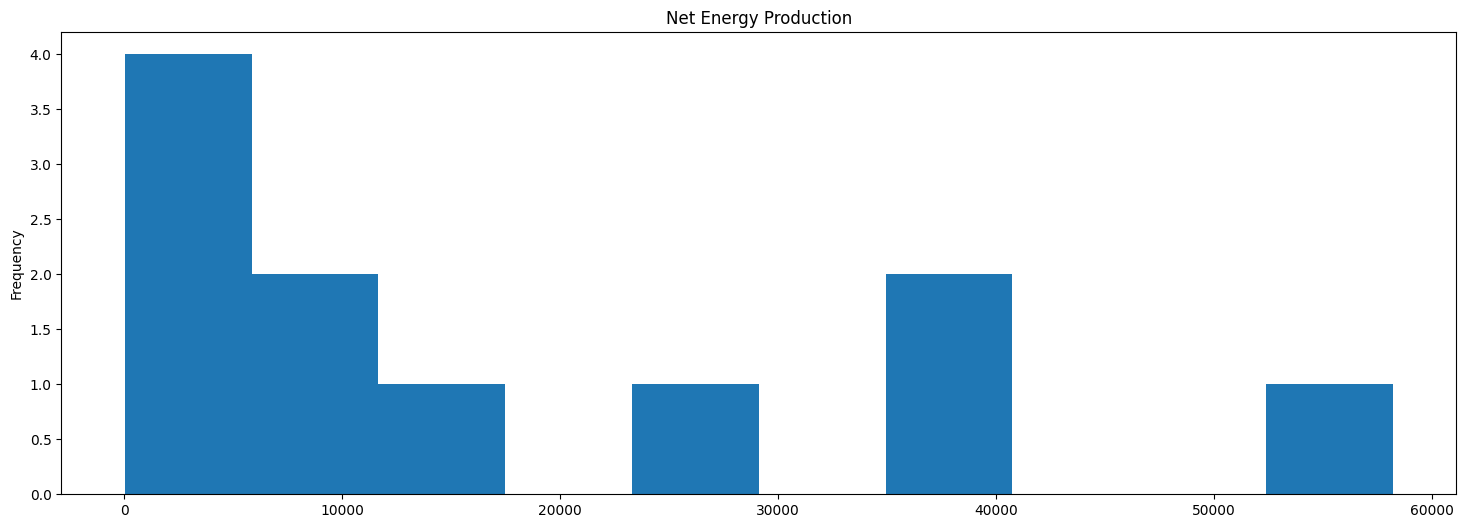

In [135]:
df[df['Country'] == "Spain"][df['Time'] > "2022-01"].groupby('Product').sum('Value').sort_values('Value', ascending=False).plot.bar(figsize=(18, 6),
    xlabel = "Countries",
    ylabel = "GWh",
    title='Net Energy Production',
    legend = False
)

### Submissions over time evolution.

<AxesSubplot: title={'center': 'Energy reported.'}, xlabel='Time periods', ylabel='Reports Frecuency'>

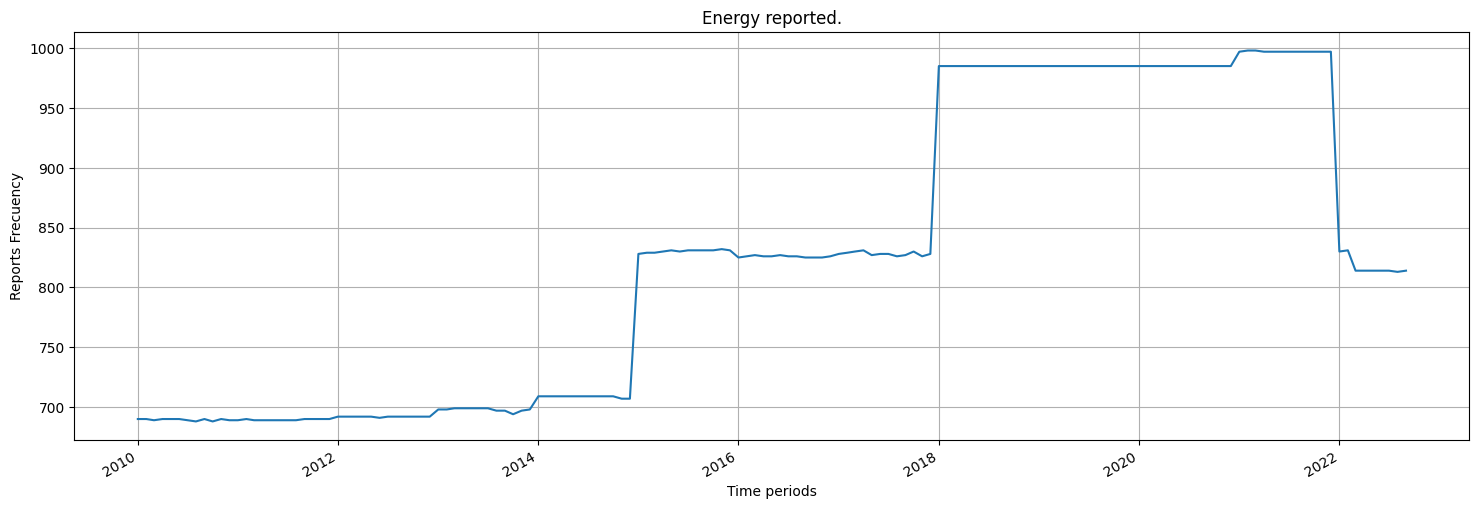

In [12]:
mes['Time_ISO'] = pd.to_datetime(mes['Time'])

mes.sort_values(by = 'Time_ISO')['Time_ISO'].value_counts().plot.line(figsize=(18, 6),
    title = 'Energy reported.',
    xlabel = "Time periods",
    ylabel = "Reports Frecuency",
    grid = True,
)

## Two variable hipothesys
1.   [Are the reports of energy getting bigger?](#increment-of-the-reported-energy-over-time)
2.   [Which are the most coumont types of reports designated by the `Balance` column?](#which-are-the-most-coumont-types-of-reports-designated-by-the-balance-column)
3.   [Which products or types of souces for the energy are the ones more frequently reported?](#which-products-or-types-of-souces-for-the-energy-are-the-ones-more-frequently-reported)


### Increment of the reported energy over time.

/var/folders/1v/lt8k31gd3cgg0zzswq00zfgr0000gn/T/ipykernel_19618/3774509797.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.jointplot(x="Value", y="Time_ISO", data=mes[mes.Country.isin(groups) == False][mes.Value > 200000], kind="scatter")


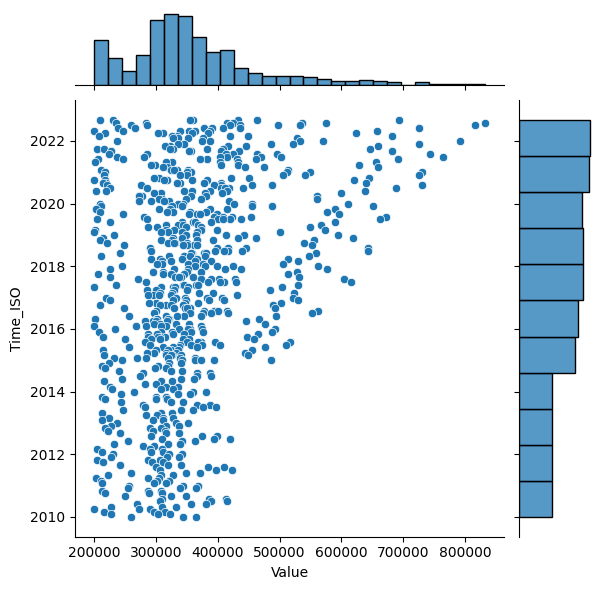

In [13]:
sns.jointplot(x="Value", y="Time_ISO", data=mes[mes.Country.isin(groups) == False][mes.Value > 200000], kind="scatter")

/var/folders/1v/lt8k31gd3cgg0zzswq00zfgr0000gn/T/ipykernel_19618/3309952489.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mes_onlycountries[mes_onlycountries.Product == Product_type][mes_onlycountries.Balance == Balace_type][['Country', 'Value']].groupby('Country').sum().plot.bar(figsize=(18, 6),


<AxesSubplot: title={'center': 'Reports to the IEA by Country'}, xlabel='Countries', ylabel='Reports Frecuency'>

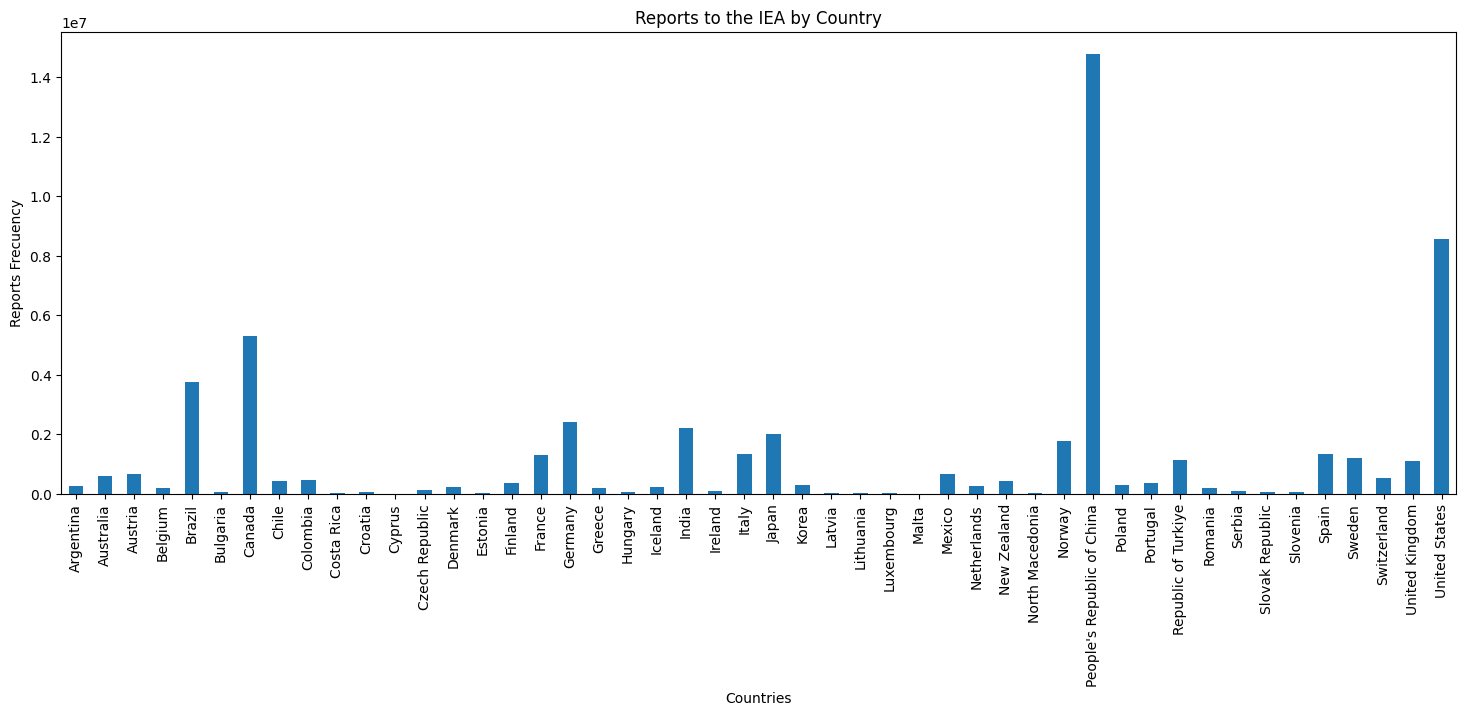

In [22]:
mes_onlycountries = mes[mes.Country.isin(groups) == False]

Product_type = 'Total Renewables (Geo, Solar, Wind, Other)'
Balace_type = 'Net Electricity Production'

mes_onlycountries[mes_onlycountries.Product == Product_type][mes_onlycountries.Balance == Balace_type][['Country', 'Value']].groupby('Country').sum().plot.bar(figsize=(18, 6),
    xlabel = "Countries",
    ylabel = "Reports Frecuency",
    title='Reports to the IEA by Country',
    color = ["C"+str(i) for i in range(mes_onlycountries['Country'].value_counts().count())],
    legend = False
)


In [27]:
Product_list = ['Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Hydro', 'Wind', 'Solar',
       'Other Combustible Non-Renewables', 'Geothermal', 
       'Nuclear', 'Other Renewables']

df = mes_onlycountries = mes[mes.Country.isin(groups) == False]

df = df[df['Balance'] == 'Net Electricity Production']
df['Product'].unique() #15

array(['Electricity', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Hydro', 'Wind', 'Solar',
       'Total Renewables (Geo, Solar, Wind, Other)',
       'Other Combustible Non-Renewables', 'Geothermal', 'Not Specified',
       'Nuclear', 'Other Renewables'], dtype=object)

In [43]:
mes_countries = mes[mes.Country.isin(groups) == False]

sns.boxplot(x="Country", y="base_total", hue="is_legendary", data=mes_countries)


""".sort_values().plot.bar(figsize=(18, 6),
    xlabel = "Countries",
    ylabel = "Reports Frecuency",
    title='Reports to the IEA by Country',
    color = ["C"+str(i) for i in range(mes_onlycountries['Country'].value_counts().count())],
)"""

NameError: name 'df' is not defined

In [ ]:
# Obtener los datos de ataque y defensa de los pokemon no legendarios
attack_non_legendary = df[df['is_legendary'] == 0]['attack']
defense_non_legendary = df[df['is_legendary'] == 0]['defense']

# Obtener los datos de ataque y defensa de los pokemon legendarios
attack_legendary = df[df['is_legendary'] == 1]['attack']
defense_legendary = df[df['is_legendary'] == 1]['defense']

# Crear el gráfico con dos llamadas a scatter para representar cada conjunto de datos
sns.scatterplot(x=attack_non_legendary, y=defense_non_legendary, marker='X')
sns.scatterplot(x=attack_legendary, y=defense_legendary, marker='o')

## Multiple graphs hipothesys

1.   [Histogram by Product.](#which-countries-report-more-information-to-the-iea)
2.   [Most used `Products` by year in Spain](#which-are-the-most-coumont-types-of-reports-designated-by-the-balance-column)
3.   [Which products or types of souces for the energy are the ones more frequently reported?](#which-products-or-types-of-souces-for-the-energy-are-the-ones-more-frequently-reported)

In [142]:
g = sns.FacetGrid(df.groupby(by='Product').sum('Value'), col="Product", col_wrap=6)
g.map(sns.scatterplot, 'Time', 'Value')

KeyError: 'Product'